In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90, high=90, size=1500)
lngs = np.random.uniform(low=-180, high=180, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

52.917052628636384 -42.62638165013374
-12.89717521826951 6.847953864589442
-9.02260802501327 119.67354757572969
11.032190001631193 68.04954325138632
-35.46807287987292 -32.93390060154883
-0.7688218599695347 -113.889137465146
-58.73004694243412 55.47670671631343
-12.68057493383587 -14.360638940839522
-34.293304417977126 72.67699911152098
38.349199806917454 -73.89028309465138
-44.41914513135243 161.41158883635046
-20.180040178671433 121.98708472576345
56.517196663304105 135.91120798411293
86.43777925596763 -83.28361032238459
-56.82636732540995 -78.82203694605968
-50.76051736084375 -35.37728921792251
30.5953362078707 -172.87289060455333
81.42936850687934 67.46306706089572
47.49732370647641 138.51595781819907
38.34558990243545 9.909977372001833
-1.261373617594984 30.652991808624876
-40.094355183014336 141.52358795298892
-74.93459170662123 73.05068900501865
-21.20244548535527 4.145358324660094
-37.820469510707 -7.6764946118052535
-14.435525295106942 -24.271463942166207
-85.50687662794097 -4

-21.209668970607368 33.97977277444187
-49.238392793233466 0.350163344452028
-79.22162810025749 106.60365558198498
84.71574176363205 -164.87460075690962
-65.36258149361962 146.6151409329131
17.94356294890096 -84.18040817993162
73.46813976406898 57.715577813106364
44.708688784727485 -125.71741511691638
82.6583129716087 44.02480950528437
72.23586274207258 69.00553872659572
52.342357847117995 35.96759085567021
16.917619471117433 -70.59901313522786
-61.69048618522467 138.47093712561264
-33.18653270621344 154.888708580531
85.61276481543422 133.69885128973118
6.631169922449345 -20.584519895619763
-21.100035514528486 -176.00278243857755
24.52215668400889 -156.27943013258738
19.87022111462744 146.71746958794972
68.35869861355187 166.54972753430718
-12.699133883464256 -109.55177453446731
79.78234379339023 179.05250229012893
-73.14044203381025 -118.40695334129055
-76.0880120394111 -55.149795088513045
-13.99365954022332 -105.4967185403116
71.35989264431933 4.343108037009728
-74.76774127304085 -64.

11.31583707116998 119.24410736397749
49.453425049755396 28.717552168851256
20.49638069143056 13.598039641404995
54.33718945450994 102.50532139699902
38.176295877546835 -48.32573355866029
-28.333564608424176 56.86068450714032
-75.21725126115909 -129.0185136309072
65.44755463520713 36.72523676251811
81.73852155167361 99.57840214311858
70.1747781230248 138.2087708572099
7.400191553468687 62.36667994270371
-26.877401221692026 -113.92778065431212
52.3022236063903 -86.88727884941643
50.70097647931388 83.73543721018825
13.150508257696842 -35.965993809326875
-19.206822528970264 -140.89409686374012
-46.686458625242715 -19.916747264274903
-63.63801269438378 -136.937730203244
24.196075389989204 -132.5862037086805
4.268821345748734 172.51855496415396
31.486349055868843 118.68931104607094
-72.15924366687278 43.59428847439676
87.7335102184121 171.39931828320255
78.90528300384094 34.42506674112684
-31.660972004274207 11.30734854125231
80.2895229228655 110.92876056306352
75.05777718617247 -173.4378056

12.198478169065822 30.131715548780534
-32.73543215554072 117.25815933046283
-25.932788986067038 -5.439405275862441
76.29067602771283 -40.57314529888134
-26.22432869180347 83.90026716927798
-49.75584298788705 -22.178664839507405
13.378193586958915 -48.87652138672357
17.612107480480702 74.37523049089032
31.118387610724454 -90.41527133884276
32.896494283398894 -128.66085976228902
48.8950979392275 107.93483502787228
23.999915944779445 85.25410736903325
74.84660125275096 -134.52416880878053
66.95936618141803 -20.993187595618508
-70.39120505491742 165.85495329989539
66.45709590276246 -4.309043564876561
64.36899343871704 -99.02611395980398
-28.101683653015904 -73.27404227598677
58.56207053946264 115.23660776778047
25.589237546438397 -17.296166400509804
-8.076434935378558 139.8679860690989
4.998416856358858 -165.98031647064622
-17.89695240556982 -121.25540567003085
-58.168837449697804 144.12063177736388
1.2625246728593993 31.300020205622587
-29.870082170071548 168.6011908215355
40.121496667888

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

609

In [7]:
# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime

In [8]:
# Starting URL for Weather Map API Call.
url_2 = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url_2)

# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("------------------")

# Create counters.
record_count = 1
set_count = 1

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=15447705ccba9995db1c8cdf7669750e
Beginning Data Retrieval     
------------------


In [9]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url_2 + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | nanortalik
Processing Record 2 of Set 1 | namibe
Processing Record 3 of Set 1 | waingapu
Processing Record 4 of Set 1 | kavaratti
Processing Record 5 of Set 1 | arraial do cabo
Processing Record 6 of Set 1 | coahuayana
Processing Record 7 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 8 of Set 1 | georgetown
Processing Record 9 of Set 1 | mahebourg
Processing Record 10 of Set 1 | atlantic city
Processing Record 11 of Set 1 | te anau
Processing Record 12 of Set 1 | broome
Processing Record 13 of Set 1 | chumikan
Processing Record 14 of Set 1 | qaanaaq
Processing Record 15 of Set 1 | punta arenas
Processing Record 16 of Set 1 | chuy
Processing Record 17 of Set 1 | kapaa
Processing Record 18 of Set 1 | amderma
City not found. Skipping...
Processing Record 19 of Set 1 | svetlaya
Processing Record 20 of Set 1 | manzil jamil
City not found. Skipping...
Processing Record 21 of Set 1 | bugene
Processing Record 22 of Set 1 | portland
Processing

Processing Record 39 of Set 4 | lata
Processing Record 40 of Set 4 | vestmanna
Processing Record 41 of Set 4 | louisbourg
City not found. Skipping...
Processing Record 42 of Set 4 | namanga
Processing Record 43 of Set 4 | kavieng
Processing Record 44 of Set 4 | pedraza
Processing Record 45 of Set 4 | unai
Processing Record 46 of Set 4 | havelock
Processing Record 47 of Set 4 | qingdao
Processing Record 48 of Set 4 | camana
Processing Record 49 of Set 4 | puerto ayora
Processing Record 50 of Set 4 | henties bay
Processing Record 1 of Set 5 | kodiak
Processing Record 2 of Set 5 | luau
Processing Record 3 of Set 5 | rawson
Processing Record 4 of Set 5 | honningsvag
Processing Record 5 of Set 5 | ponta do sol
Processing Record 6 of Set 5 | nalut
Processing Record 7 of Set 5 | tumannyy
City not found. Skipping...
Processing Record 8 of Set 5 | vaitape
Processing Record 9 of Set 5 | sokolovo
Processing Record 10 of Set 5 | marawi
Processing Record 11 of Set 5 | banda aceh
Processing Record 1

Processing Record 28 of Set 8 | svetlogorsk
Processing Record 29 of Set 8 | bone
Processing Record 30 of Set 8 | broken hill
Processing Record 31 of Set 8 | belaya gora
Processing Record 32 of Set 8 | novobirilyussy
Processing Record 33 of Set 8 | kodinar
Processing Record 34 of Set 8 | dien bien
City not found. Skipping...
Processing Record 35 of Set 8 | pryluky
Processing Record 36 of Set 8 | uglovskoye
Processing Record 37 of Set 8 | evensk
Processing Record 38 of Set 8 | kununurra
Processing Record 39 of Set 8 | mocambique
City not found. Skipping...
Processing Record 40 of Set 8 | teguise
Processing Record 41 of Set 8 | karaul
City not found. Skipping...
Processing Record 42 of Set 8 | san cristobal
Processing Record 43 of Set 8 | elva
Processing Record 44 of Set 8 | beidao
Processing Record 45 of Set 8 | kalabo
Processing Record 46 of Set 8 | coihaique
Processing Record 47 of Set 8 | mangrol
Processing Record 48 of Set 8 | fort-shevchenko
Processing Record 49 of Set 8 | eshowe
Pr

Processing Record 15 of Set 12 | kapit
Processing Record 16 of Set 12 | lima
Processing Record 17 of Set 12 | lhokseumawe
Processing Record 18 of Set 12 | valera
Processing Record 19 of Set 12 | jiroft
City not found. Skipping...
Processing Record 20 of Set 12 | cabra
Processing Record 21 of Set 12 | half moon bay
Processing Record 22 of Set 12 | veraval
Processing Record 23 of Set 12 | kamenka
Processing Record 24 of Set 12 | santa maria
Processing Record 25 of Set 12 | tucuman
Processing Record 26 of Set 12 | troy
Processing Record 27 of Set 12 | davila
Processing Record 28 of Set 12 | zyryanka
Processing Record 29 of Set 12 | flin flon
Processing Record 30 of Set 12 | bartica
Processing Record 31 of Set 12 | muros
Processing Record 32 of Set 12 | vicuna
Processing Record 33 of Set 12 | samusu
City not found. Skipping...
Processing Record 34 of Set 12 | praia
Processing Record 35 of Set 12 | bengkulu
Processing Record 36 of Set 12 | ossora
Processing Record 37 of Set 12 | ebeltoft
Pr

In [10]:
len(city_data)

557

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Nanortalik,60.1432,-45.2371,49.93,86,23,13.67,GL,2022-07-20 22:56:54
1,Namibe,-15.1961,12.1522,62.56,80,1,5.35,AO,2022-07-20 22:54:20
2,Waingapu,-9.6567,120.2641,72.45,77,33,7.76,ID,2022-07-20 22:52:56
3,Kavaratti,10.5669,72.6420,81.05,79,100,19.89,IN,2022-07-20 22:56:55
4,Arraial Do Cabo,-22.9661,-42.0278,71.46,83,40,5.75,BR,2022-07-20 22:54:39


In [12]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df2 = city_data_df[new_column_order]
city_data_df2.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Nanortalik,GL,2022-07-20 22:56:54,60.1432,-45.2371,49.93,86,23,13.67
1,Namibe,AO,2022-07-20 22:54:20,-15.1961,12.1522,62.56,80,1,5.35
2,Waingapu,ID,2022-07-20 22:52:56,-9.6567,120.2641,72.45,77,33,7.76
3,Kavaratti,IN,2022-07-20 22:56:55,10.5669,72.6420,81.05,79,100,19.89
4,Arraial Do Cabo,BR,2022-07-20 22:54:39,-22.9661,-42.0278,71.46,83,40,5.75
5,Coahuayana,MX,2022-07-20 22:56:55,18.7333,-103.6833,90.34,62,43,5.59
6,Georgetown,MY,2022-07-20 22:56:07,5.4112,100.3354,80.89,90,20,3.44
7,Mahebourg,MU,2022-07-20 22:56:56,-20.4081,57.7000,68.29,73,40,14.97
8,Atlantic City,US,2022-07-20 22:56:56,39.3643,-74.4229,87.03,70,1,14.03
9,Te Anau,NZ,2022-07-20 22:56:32,-45.4167,167.7167,40.89,89,97,2.80


In [13]:
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"

# Export the City_data into a CSV.
city_data_df2.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

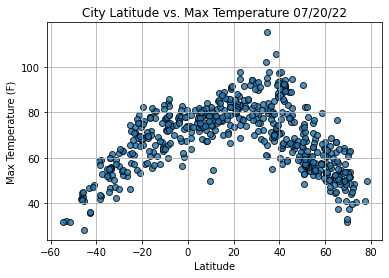

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

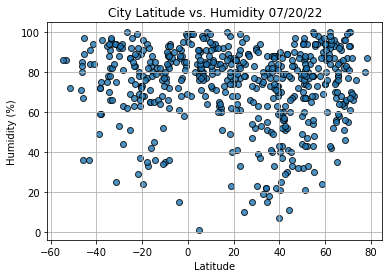

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

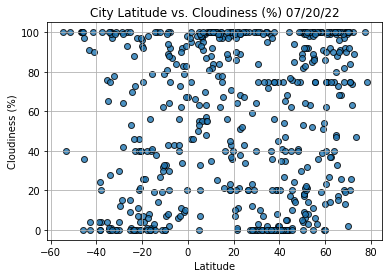

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

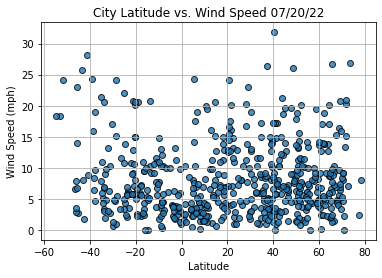

In [32]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [57]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [48]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df2.loc[(city_data_df2["Lat"] >= 0)]
southern_hemi_df = city_data_df2.loc[(city_data_df2["Lat"] < 0)]

In [35]:
index13 = city_data_df2.loc[13]
index13

City                 Punta Arenas
Country                        CL
Date          2022-07-20 22:54:40
Lat                        -53.15
Lng                      -70.9167
Max Temp                    32.02
Humidity                       86
Cloudiness                     40
Wind Speed                  18.41
Name: 13, dtype: object

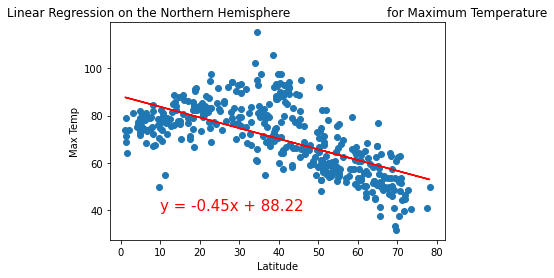

In [50]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

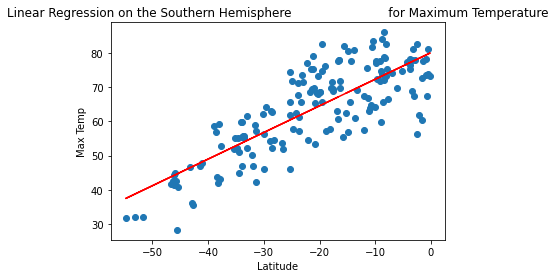

In [51]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

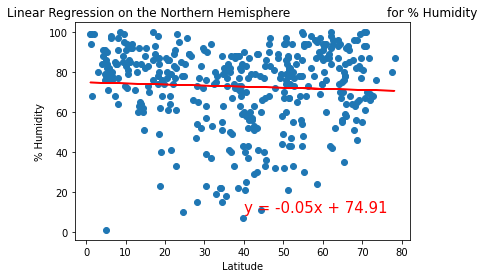

In [52]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

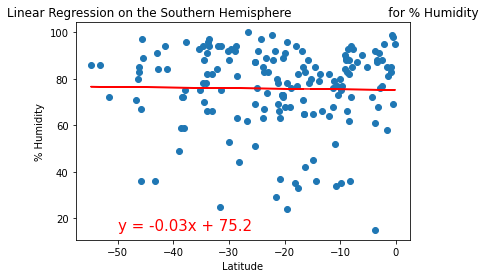

In [53]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

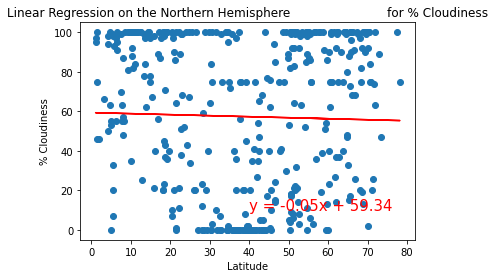

In [54]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40, 10))

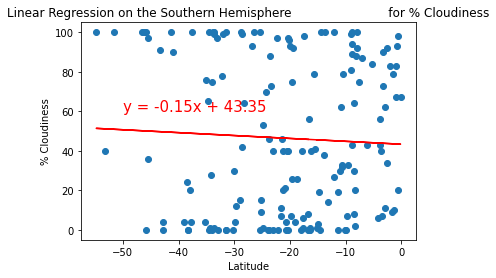

In [55]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

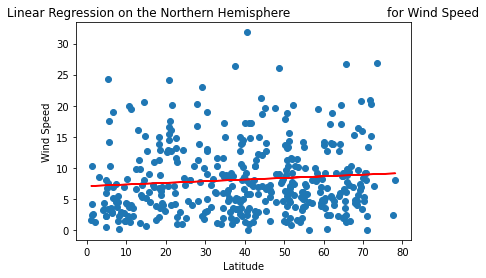

In [56]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

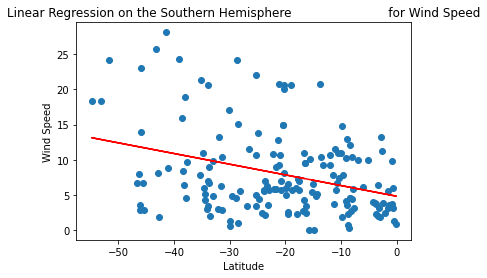

In [60]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))